In [1]:
from EarthquakeSignal import config, EarthquakeBatchProcessor


In [2]:
# pip list

### Set config manual 

In [3]:
config = {
    'file_extension': '.txt',
    'unit_factor': 981,
    
    'apply_baseline_correction': True,
    'apply_arias_analysis': True,
    'apply_fourier_analysis': True,
    '_compute_newmark_spectra': True,
    'compute_rotd': True,
    'print_summary': True,
    
    'plot_signals': True,
    'plot_corrected_signals': False,
    'plot_arias_signals': False,
    'plot_fourier_signals': False,  
    'plot_newmark_spectra': True,
    'plot_rotd': True,
}


In [4]:
registers_path = r'data'



📌 Earthquake ID: ACH1
Sampling interval (dt): 0.010000 s
Number of samples: 15502
Total duration: 155.02 s
Component information:
  - H1: file='ACH1_201604162359_E_100.txt', RMS=4.2701e-03
  - H2: file='ACH1_201604162359_N_100.txt', RMS=4.7774e-03
  - V: file='ACH1_201604162359_Z_100.txt', RMS=1.7063e-03



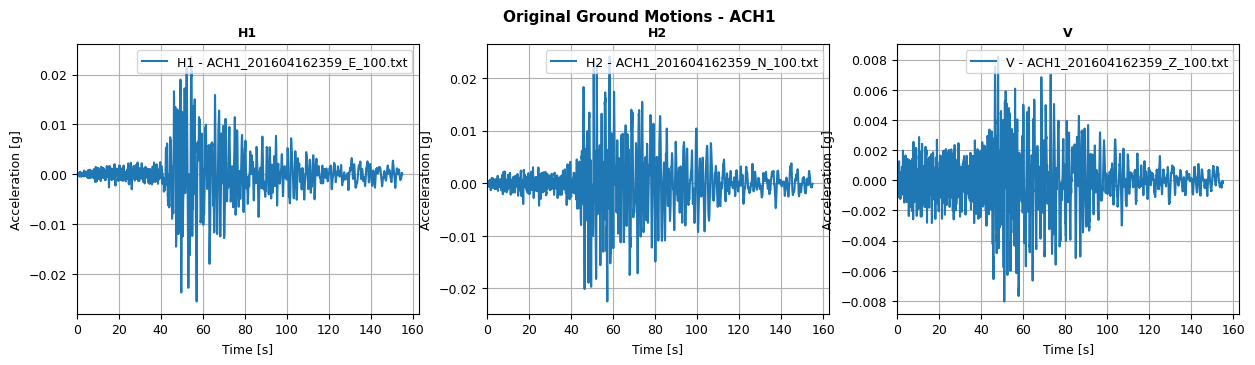

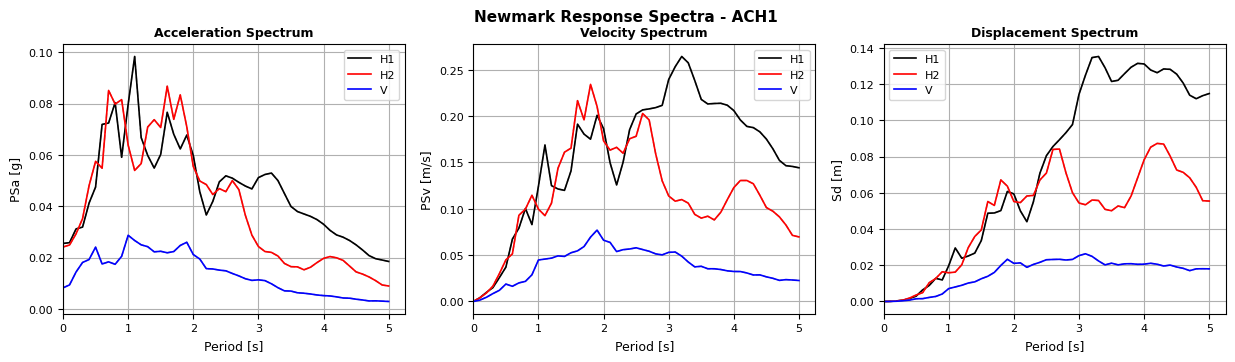

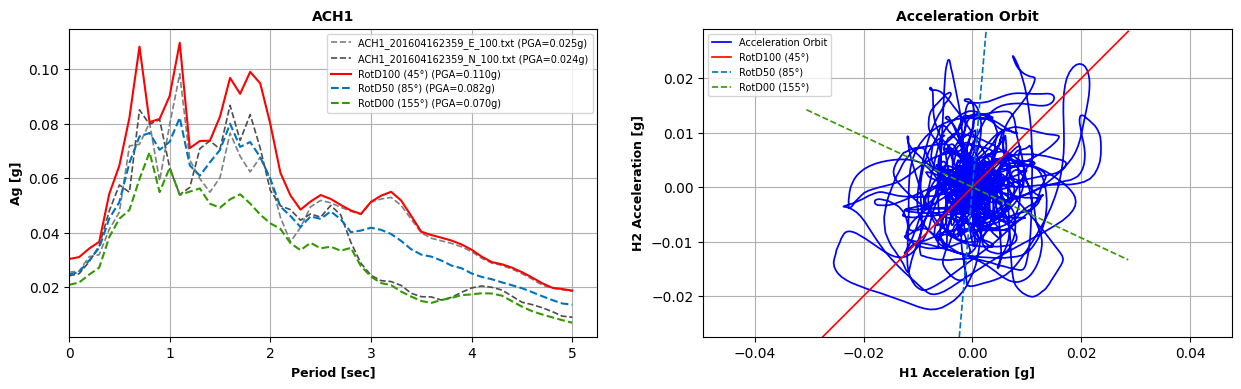


📌 Earthquake ID: AGYE
Sampling interval (dt): 0.010000 s
Number of samples: 10001
Total duration: 100.01 s
Component information:
  - H1: file='AGYE_201604162359_E_100.txt', RMS=2.8186e-03
  - H2: file='AGYE_201604162359_N_100.txt', RMS=3.0889e-03
  - V: file='AGYE_201604162359_Z_100.txt', RMS=2.3301e-03



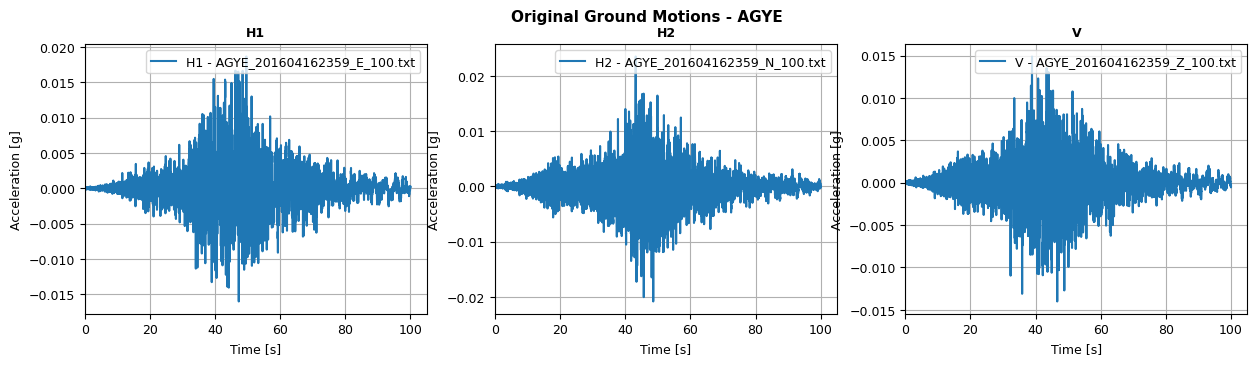

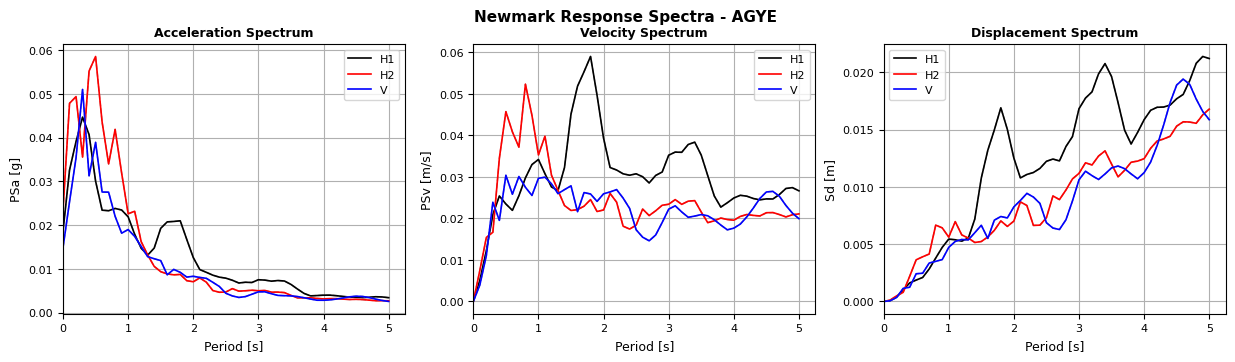

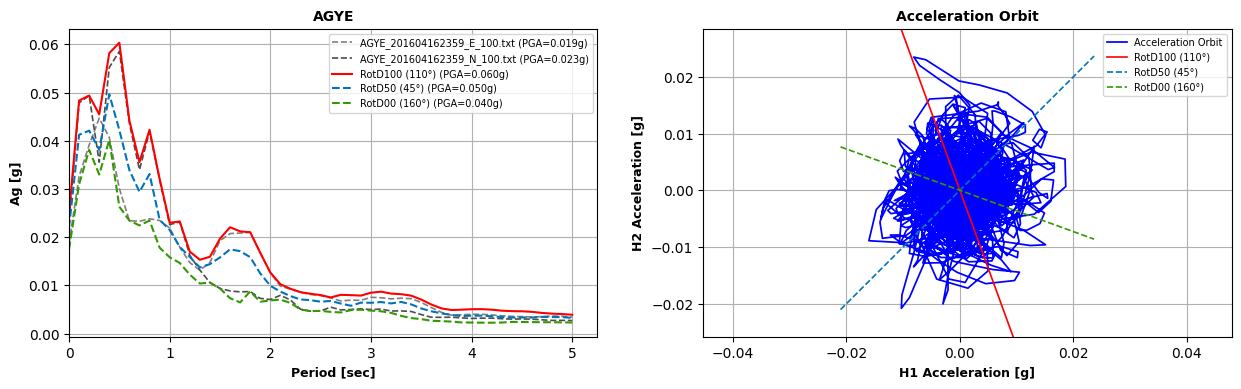


📌 Earthquake ID: AMNT
Sampling interval (dt): 0.010000 s
Number of samples: 5001
Total duration: 50.01 s
Component information:
  - H1: file='AMNT_201604162359_N_100.txt', RMS=5.4586e-02
  - H2: file='AMNT_201604162359_E_100.txt', RMS=5.6990e-02
  - V: file='AMNT_201604162359_Z_100.txt', RMS=2.3099e-02



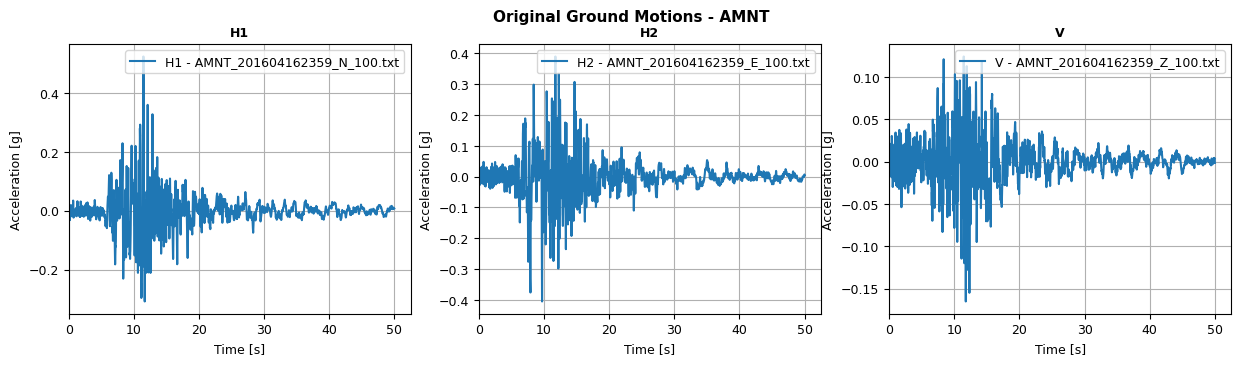

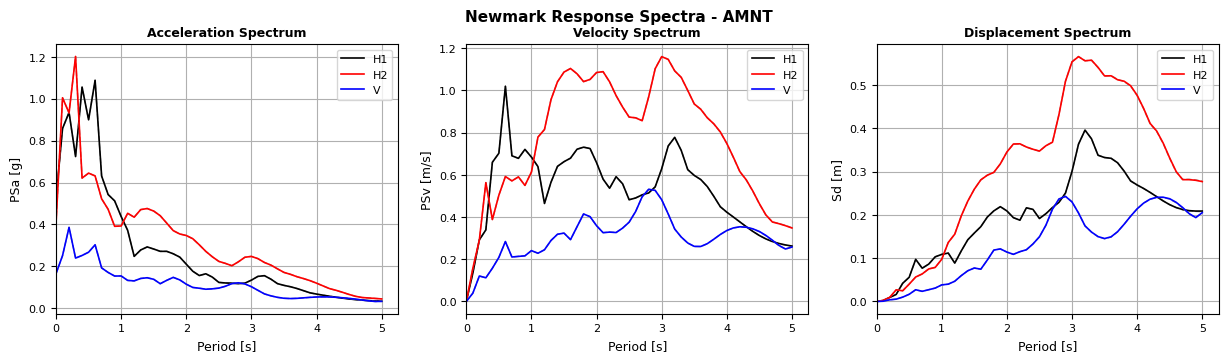

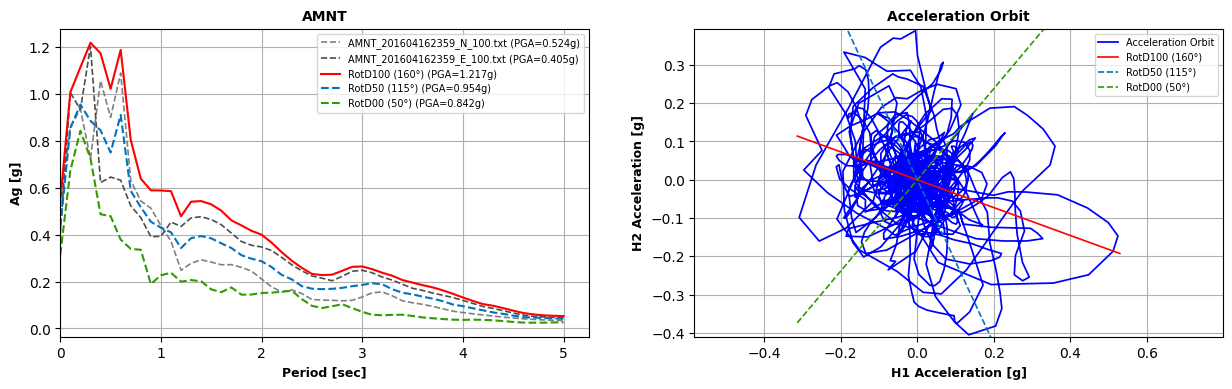


📌 Earthquake ID: APED
Sampling interval (dt): 0.010000 s
Number of samples: 17502
Total duration: 175.02 s
Component information:
  - H1: file='APED_201604162359_N_100.txt', RMS=8.4004e-02
  - H2: file='APED_201604162359_E_100.txt', RMS=1.0348e-01
  - V: file='APED_201604162359_Z_100.txt', RMS=4.8905e-02



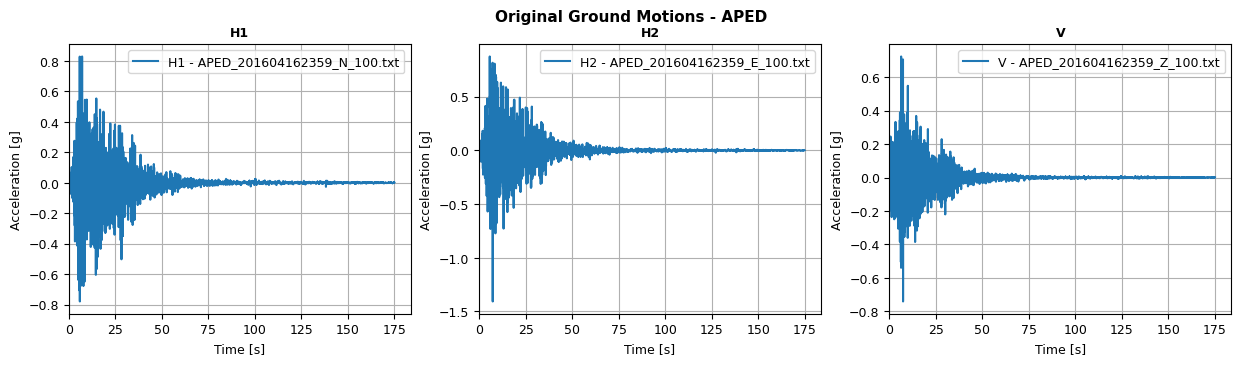

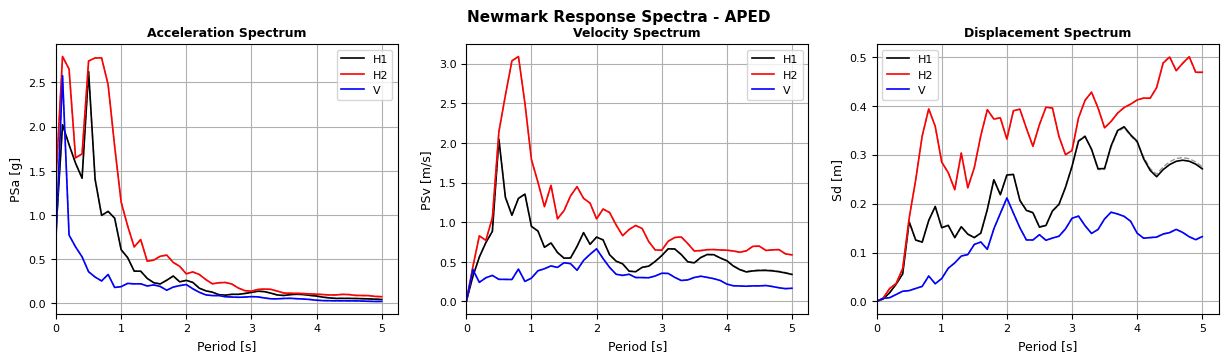

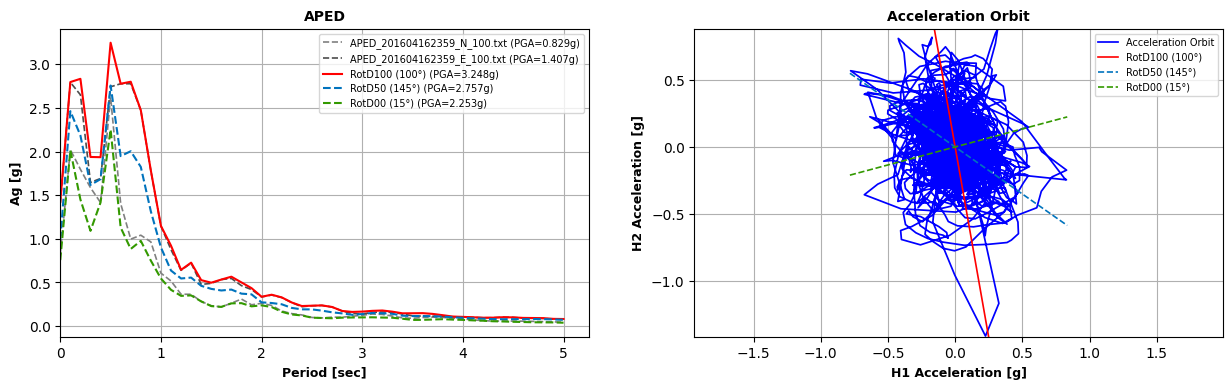

In [ ]:
processor = EarthquakeBatchProcessor(registers_path, config)
earthquake = processor.process_all()


### For each earthquake

In [ ]:
# earthquake['RSN1'].print_summary()
# earthquake['RSN1'].plot_original_signals()
# earthquake['RSN1'].plot_corrected_signals()
# earthquake['RSN1'].plot_arias_signals()
# earthquake['RSN1'].plot_fourier_signals()
# earthquake['RSN1'].plot_newmark_spectra()


In [ ]:
# record = earthquake['RSN1']


# print("🔹 Arias Intensity")
# print(f"Significant Duration Start  : {record.arias['H1']['t_start']:.3f} s")
# print(f"Significant Duration End    : {record.arias['H1']['t_end']:.3f} s")
# print(f"Total Arias Intensity       : {record.arias['H1']['IA_total']:.5f} m/s")
# print(f"Destructive Potential Index : {record.arias['H1']['pot_dest']:.5f}")


# print("\n🔹 Fourier Analysis")
# print("Dominant Periods (s):", record.fourier['H1']['dominant_periods'])

In [ ]:
earthquake['APED'].print_summary()
earthquake['APED'].plot_original_signals()
earthquake['APED'].plot_corrected_signals()
earthquake['APED'].plot_arias_signals()
earthquake['APED'].plot_fourier_signals()
earthquake['APED'].plot_newmark_spectra()


In [ ]:
record = earthquake['APED']


print("🔹 Arias Intensity")
print(f"Significant Duration Start  : {record.arias['H1']['t_start']:.3f} s")
print(f"Significant Duration End    : {record.arias['H1']['t_end']:.3f} s")
print(f"Total Arias Intensity       : {record.arias['H1']['IA_total']:.5f} m/s")
print(f"Destructive Potential Index : {record.arias['H1']['pot_dest']:.5f}")


print("\n🔹 Fourier Analysis")
print("Dominant Periods (s):", record.fourier['H1']['dominant_periods'])

## Keys and Methods

In [ ]:

first_key = next(iter(earthquake))
eq = earthquake[first_key]

print("Keys:")
for key in vars(eq):
    print(f"  - {key}")

print("\nMethods:")
import inspect
methods = [name for name, obj in inspect.getmembers(eq, inspect.ismethod) if not name.startswith('_')]
for m in methods:
    print(f"  - {m}()")

### All spectra

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with 1 row and 2 columns
plt.figure(figsize=(14, 4))

# Subplot for H1
plt.subplot(1, 2, 1)
for rsn, eq in earthquake.items():
    try:
        T_H1 = eq.newmark_spectra['H1']['T']
        PSa_H1 = eq.newmark_spectra['H1']['PSa']
        plt.plot(T_H1, PSa_H1, linewidth=1.5, label=f"{rsn}")
    except KeyError:
        print(f"Warning: {rsn} missing H1 spectrum")

plt.title("Component H1", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0,right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)

# Subplot for H2
plt.subplot(1, 2, 2)
for rsn, eq in earthquake.items():
    try:
        T_H2 = eq.newmark_spectra['H2']['T']
        PSa_H2 = eq.newmark_spectra['H2']['PSa']
        plt.plot(T_H2, PSa_H2, linewidth=1.5, label=f"{rsn}")
    except KeyError:
        print(f"Warning: {rsn} missing H2 spectrum")

plt.title("Component H2", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0,right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)

# Super title
plt.suptitle("All Records", fontsize=11, fontweight='bold')
plt.show()


### Rotd100

In [ ]:


# Create figure with 1 row and 1 column
plt.figure(figsize=(7, 4))

# Subplot for ROTD100
plt.subplot(1, 1, 1)
for rsn, eq in earthquake.items():
    try:

        T = eq.rotd['T']
        PSa_rotd100 = eq.rotd['ROTD100']
        pga = round(PSa_rotd100[0], 3)
        plt.plot(T, PSa_rotd100, linewidth=1.5, label=f"{rsn} -PGA:{pga} g")
    except KeyError:
        print(f"Warning: {rsn} missing ROTD100 spectrum")

plt.title("ROTD100 - All Records", fontsize=10, fontweight='bold')
plt.xlabel("Period [s]", fontsize=9, fontweight='bold')
plt.ylabel("PSa [g]", fontsize=9, fontweight='bold')
plt.grid(True, which='both')
plt.xlim(left=0, right=5)
plt.tick_params(axis='both', labelsize=8)
plt.legend(fontsize=7, loc='upper right', ncol=2)
plt.tight_layout()
plt.show()
